<a href="https://colab.research.google.com/github/kunalpagarey/PyTocrh_Tutorial/blob/master/PyTorch_DNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [0]:
# Load MNIST Dataset.

transform = transforms.Compose([transforms.Resize((28, 28)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
train_data = datasets.MNIST('./data/', train=True, transform=transform, download=True)
val_data = datasets.MNIST('./data/', train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
val_loader = DataLoader(val_data, batch_size=100)

In [0]:
# convert tensors into images.
def convert_image(img):
    image = img.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image*np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

tensor([2, 7, 9, 2, 6, 3, 1, 5, 4, 8, 0, 5, 5, 8, 0, 7, 4, 9, 6, 9, 7, 3, 8, 5,
        1, 6, 8, 5, 1, 8, 6, 3, 2, 8, 3, 8, 1, 0, 7, 7, 2, 1, 4, 4, 8, 0, 9, 0,
        1, 1, 5, 7, 9, 2, 8, 2, 1, 4, 7, 3, 3, 3, 6, 0, 3, 9, 8, 1, 9, 5, 2, 1,
        0, 8, 6, 8, 1, 5, 3, 5, 0, 4, 6, 1, 2, 5, 4, 3, 3, 5, 0, 9, 3, 8, 6, 2,
        1, 2, 4, 1])


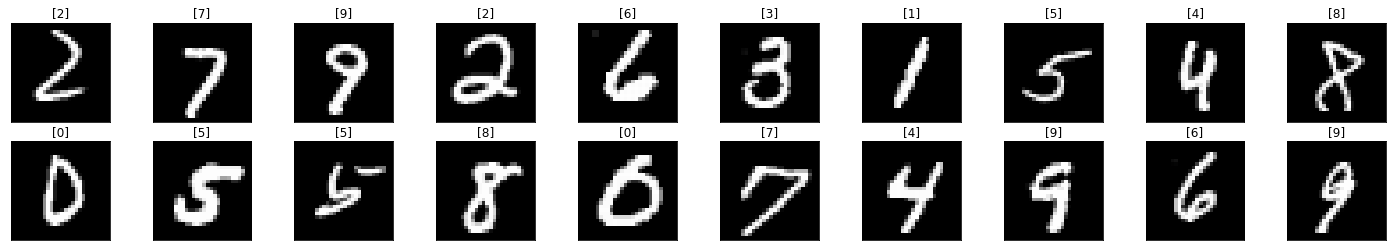

In [4]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(labels)
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(convert_image(images[idx]))
    ax.set_title([labels[idx].item()])

In [0]:
# Classsifier Network

class MNIST_classifier(nn.Module):
    def __init__(self, in_dim, h1, h2, out_dim):
        super(MNIST_classifier, self).__init__()
        self.linear1 = nn.Linear(in_dim, h1)
        self.linear2 = nn.Linear(h1, h2)
        self.linear3 = nn.Linear(h2, out_dim)

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [6]:
model = MNIST_classifier(784, 125, 65, 10)
print(model)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

MNIST_classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)


In [7]:
epochs = 15
t_losses = []
t_accuracy = []
v_losses = []
v_accuracy = []
for e in range(epochs):
    te_loss = 0.0
    te_correct = 0.0
    ve_loss = 0.0
    ve_correct = 0.0

    for inputs, labels in train_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        output = model(inputs)
        loss = criterion(output, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, pred = torch.max(output, 1)

        te_loss += loss.item()
        te_correct += torch.sum(pred == labels)
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.view(inputs.shape[0], -1)
            output = model(inputs)
            loss = criterion(output, labels)

            _, pred = torch.max(output, 1)

            ve_loss += loss.item()
            ve_correct += torch.sum(pred == labels)
    
    #losses
    te_loss = te_loss/len(train_loader)
    te_correct = te_correct/len(train_loader)
    ve_loss = ve_loss/len(val_loader)
    ve_correct = ve_correct/len(val_loader)

    #accuracies
    t_accuracy.append(te_correct)
    t_losses.append(te_loss)
    v_accuracy.append(ve_correct)
    v_losses.append(ve_loss)
    print("Epoch: {}, Loss = {:.4f}, Accuracy = {:.4f}, Val loss = {:0.4f}, " \
          "Val_accuracy = {:0.4f}".format(e, te_loss, te_correct.item(), ve_loss,
                                          ve_correct.item()))
    

Epoch: 0, Loss = 0.9298, Accuracy = 77.0567, Val loss = 0.4246, Val_accuracy = 88.7800
Epoch: 1, Loss = 0.3839, Accuracy = 89.0700, Val loss = 0.3307, Val_accuracy = 90.3400
Epoch: 2, Loss = 0.3253, Accuracy = 90.5733, Val loss = 0.2943, Val_accuracy = 91.4600
Epoch: 3, Loss = 0.2944, Accuracy = 91.3150, Val loss = 0.2733, Val_accuracy = 92.3500
Epoch: 4, Loss = 0.2688, Accuracy = 92.1767, Val loss = 0.2472, Val_accuracy = 92.8600
Epoch: 5, Loss = 0.2440, Accuracy = 92.8733, Val loss = 0.2270, Val_accuracy = 93.7100
Epoch: 6, Loss = 0.2240, Accuracy = 93.5483, Val loss = 0.2111, Val_accuracy = 93.9500
Epoch: 7, Loss = 0.2055, Accuracy = 94.0333, Val loss = 0.1952, Val_accuracy = 94.3800
Epoch: 8, Loss = 0.1906, Accuracy = 94.5117, Val loss = 0.1846, Val_accuracy = 94.5300
Epoch: 9, Loss = 0.1774, Accuracy = 94.9450, Val loss = 0.1707, Val_accuracy = 95.0100
Epoch: 10, Loss = 0.1655, Accuracy = 95.1800, Val loss = 0.1635, Val_accuracy = 95.0800
Epoch: 11, Loss = 0.1562, Accuracy = 95.44

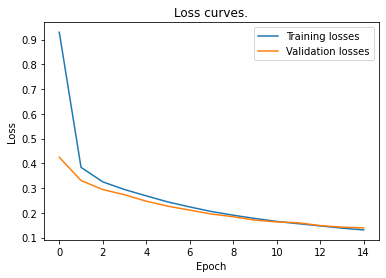

In [8]:
plt.plot(t_losses, label="Training losses")
plt.plot(v_losses, label="Validation losses")
plt.title("Loss curves.")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

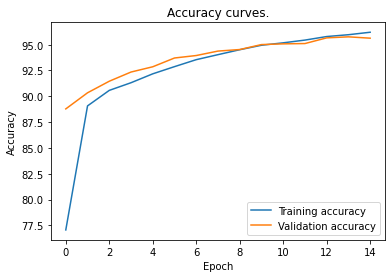

In [9]:
plt.plot(t_accuracy, label="Training accuracy")
plt.plot(v_accuracy, label="Validation accuracy")
plt.title("Accuracy curves.")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [0]:
import PIL.ImageOps as ops
from PIL import Image
import requests

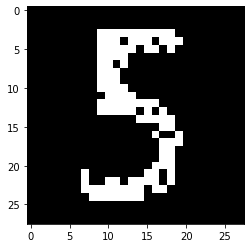

In [11]:
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'

response = requests.get(url, stream=True)
img = Image.open(response.raw)
img = ops.invert(img)
img=img.convert('1')
img = transform(img)
plt.imshow(convert_image(img))

In [12]:
in_img = img.view(img.shape[0], -1)
out = model(in_img)
_, prediction = torch.max(out, 1)
print(prediction.item())

5


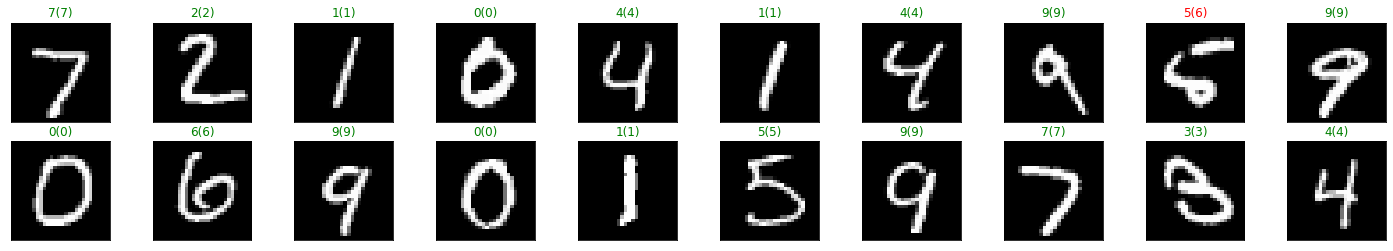

In [13]:
dataiter = iter(val_loader)
images, labels = dataiter.next()
in_imgs = images.view(images.shape[0], -1)
logits = model(in_imgs)
_, predictions = torch.max(logits, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(convert_image(images[idx]))
    ax.set_title("{}({})".format(str(labels[idx].item()), str(predictions[idx].item())), 
                 color="green" if predictions[idx] == labels[idx] else "red")